In [6]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
df_youtube_spam = pd.read_csv("/content/drive/My Drive/Youtube-Spam-Dataset.csv")
df_youtube_spam = df_youtube_spam[['CONTENT', 'CLASS']]

In [5]:
df_youtube_spam.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Remove stop words, lemmatize, and remove words with length ≤ 2
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    return ' '.join(words)


# Apply preprocessing function to 'CONTENT' column
df_youtube_spam['CONTENT'] = df_youtube_spam['CONTENT'].apply(preprocess_text)

# Display first few rows after preprocessing
df_youtube_spam.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,CONTENT,CLASS
0,huh anyway check channel kobyoshi,1
1,hey guy check new channel first vid monkey mon...,1
2,test say murdevcom,1
3,shaking sexy channel enjoy,1
4,watchvvtarggvgtwq check,1


<ipython-input-10-026972474712>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLASS', data=df_youtube_spam, palette="viridis")


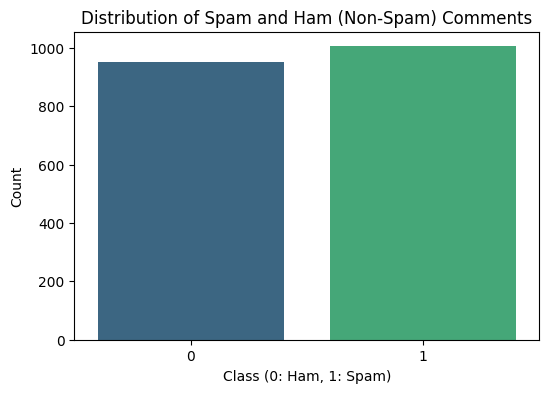

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=df_youtube_spam, palette="viridis")
plt.title("Distribution of Spam and Ham (Non-Spam) Comments")
plt.xlabel("Class (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()


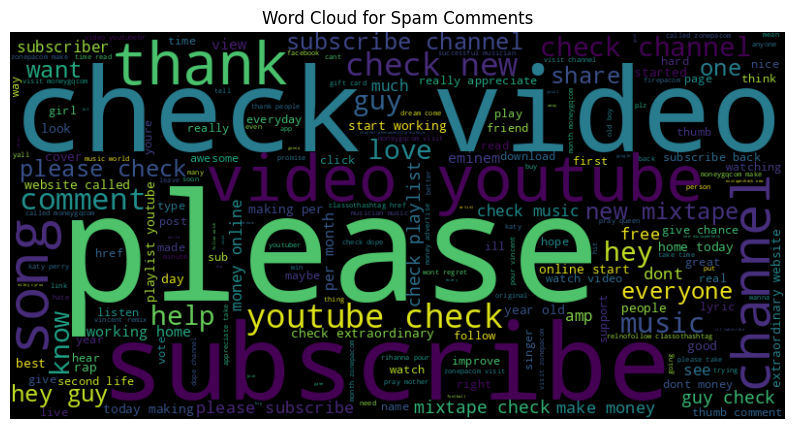

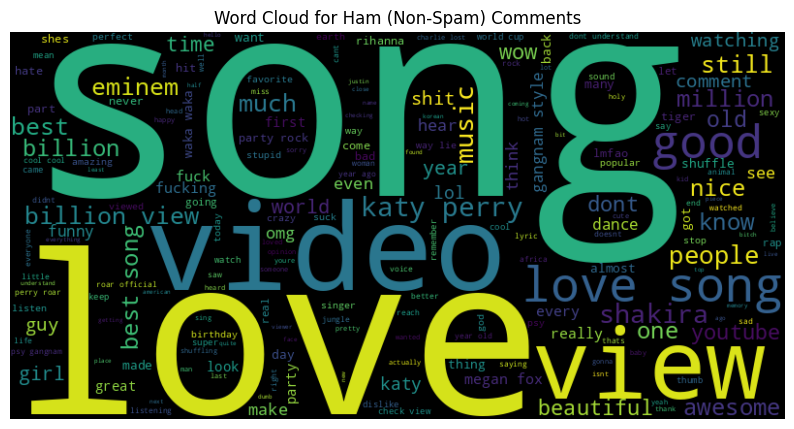

In [11]:
from wordcloud import WordCloud

# Combine text data for spam and ham comments separately
spam_words = ' '.join(df_youtube_spam[df_youtube_spam['CLASS'] == 1]['CONTENT'])
ham_words = ' '.join(df_youtube_spam[df_youtube_spam['CLASS'] == 0]['CONTENT'])

# Generate and plot Word Cloud for Spam Comments
plt.figure(figsize=(10, 6))
wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Spam Comments")
plt.show()

# Generate and plot Word Cloud for Ham (Non-Spam) Comments
plt.figure(figsize=(10, 6))
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Ham (Non-Spam) Comments")
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer and fit-transform the preprocessed text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_youtube_spam['CONTENT']).toarray()
y = df_youtube_spam['CLASS']


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_test, y_pred))

# Evaluate Naive Bayes
print("Naive Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)

Naive Bayes Performance:
Accuracy: 0.90
Precision: 0.92
Recall: 0.90
F1 Score: 0.91
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       176
           1       0.92      0.90      0.91       216

    accuracy                           0.90       392
   macro avg       0.90      0.90      0.90       392
weighted avg       0.90      0.90      0.90       392



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Random Forest Classifier with Grid Search for best parameters
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf_model, param_grid_rf, scoring='f1', cv=3)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_


In [21]:
# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model(best_rf_model, X_test, y_test)

Random Forest Performance:
Accuracy: 0.88
Precision: 0.96
Recall: 0.81
F1 Score: 0.88
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       176
           1       0.96      0.81      0.88       216

    accuracy                           0.88       392
   macro avg       0.88      0.88      0.87       392
weighted avg       0.89      0.88      0.88       392



In [23]:
from sklearn.svm import SVC
# Support Vector Classifier with Grid Search for best parameters
svm_model = SVC(random_state=42)
param_grid_svm = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_model, param_grid_svm, scoring='f1', cv=3)
svm_grid.fit(X_train, y_train)
best_svm_model = svm_grid.best_estimator_

In [24]:
# Evaluate SVM
print("SVM Performance:")
evaluate_model(best_svm_model, X_test, y_test)

SVM Performance:
Accuracy: 0.91
Precision: 0.96
Recall: 0.87
F1 Score: 0.91
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       176
           1       0.96      0.87      0.91       216

    accuracy                           0.91       392
   macro avg       0.91      0.91      0.91       392
weighted avg       0.91      0.91      0.91       392

